# LeNet 5

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train)

(60000, 28, 28)
(10000, 28, 28)
[5 0 4 ... 5 6 8]


In [6]:
# reshaping data for CNN input
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) # 1 represent the chanel size of grayscale image
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
print(x_train.shape)

(60000, 28, 28, 1)


In [7]:
# Normalize pixel values to be between 0 and 1. Normalization helps to reduce the training time
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [9]:
# CNN model creation
model = Sequential()

# Layer 1
# Conv 1
model.add(Conv2D(filters=6, kernel_size=(5,5), strides=1, activation='sigmoid', input_shape=(28,28,1)))
# pool 1
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# Layer 2
# Conv 2
model.add(Conv2D(filters=16, kernel_size=(5,5), strides=1, activation='sigmoid'))
# pool 2
model.add(MaxPooling2D(pool_size=2, strides=2))

# Flattening layer
model.add(Flatten())

# Layer 3 could not be added as the dimensions were already too low. Since we took images with 28x28 instead of 32x32

# Fully connected layer Layer 4 & 5
# FC 1
model.add(Dense(units=120, activation='sigmoid'))
# FC 2 
model.add(Dense(units=84, activation='sigmoid'))

# Output Layer
model.add(Dense(units=10, activation='softmax'))


C:\Users\KH.EN.P2MCA24126\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# train the model
history = model.fit(x_train,y_train, 
                    batch_size=128, epochs=10, 
                    verbose=1, 
                    validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2919 - loss: 1.9747 - val_accuracy: 0.9083 - val_loss: 0.3553
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9195 - loss: 0.2967 - val_accuracy: 0.9514 - val_loss: 0.1656
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9514 - loss: 0.1616 - val_accuracy: 0.9667 - val_loss: 0.1069
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9657 - loss: 0.1146 - val_accuracy: 0.9738 - val_loss: 0.0846
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9728 - loss: 0.0912 - val_accuracy: 0.9782 - val_loss: 0.0726
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9749 - loss: 0.0801 - val_accuracy: 0.9802 - val_loss: 0.0625
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9797 - loss: 0.0673 - val_accuracy: 0.9809 - val_loss: 0.0576
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9816 - loss: 0.0611 - val_accuracy: 0.

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,280 (520.63 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88,854 (347.09 KB)

In [13]:
# model evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy : ',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9805 - loss: 0.0537
Test Accuracy :  0.9843000173568726


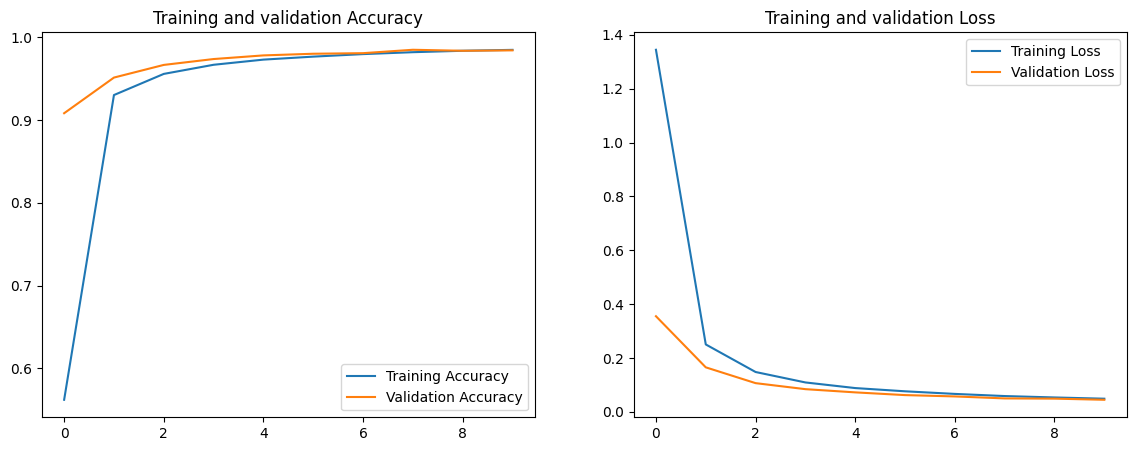

In [14]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and validation Loss')

plt.savefig('./LeNet.png')
plt.show()